$y=1.567x+0.067+z, z \in (0,0.01)$

times: 0, loss: 9.089009284537081, w: 1.045046088647364, n:0.0013391047164149445
times: 50, loss: 0.0006714120833644642, w: 1.5670036488513324, n:0.04308104854259045
times: 100, loss: 0.00017563407301258272, w: 1.5670036589191267, n:0.05828232476278313
times: 150, loss: 0.00010988421345542973, w: 1.567003662585512, n:0.06381816866088677
times: 200, loss: 0.00010116449628056803, w: 1.5670036639206986, n:0.06583415516230055
times: 250, loss: 0.00010000809126127592, w: 1.567003664406933, n:0.066568316321591
times: 300, loss: 9.985472934117847e-05, w: 1.5670036645840046, n:0.06683567555610608
times: 350, loss: 9.983439055144388e-05, w: 1.5670036646484888, n:0.06693303968300916
times: 400, loss: 9.983169323017997e-05, w: 1.567003664671972, n:0.06696849674595594
times: 450, loss: 9.983133551263268e-05, w: 1.5670036646805239, n:0.0669814091332263
times: 500, loss: 9.983128807228971e-05, w: 1.5670036646836383, n:0.06698611143316774
times: 550, loss: 9.983128178077172e-05, w: 1.5670036646847725

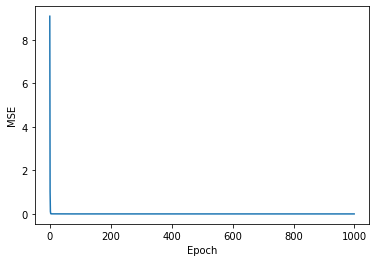

Final loss:9.983128081882055e-05, w: 1.567003664685422, b: 0.06698880454692331


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def mse(b, w, points):
    totalErr = 0
    for i in range(0, len(points)):
        x, y = points[i]
        totalErr += (y - (w * x + b)) ** 2
    
    return totalErr / float(len(points))

def step_gradient(b, w, points, lr):
    b_gradient, w_gradient = 0, 0
    M = float(len(points))
    for i in  range(0, len(points)):
        x, y = points[i]
        b_gradient += (2/M) * ((w * x + b - y))
        w_gradient += (2/M) * x * ((w * x + b) - y)
    new_b = b - (lr * b_gradient)
    new_w = w - (lr * w_gradient)
    return [new_b, new_w]

def gradient_descent(points, starting_b, starting_w, lr, times):
    losses = []
    b = starting_b
    w = starting_w
    for step in range(times):
        b, w = step_gradient(b, w, np.array(points), lr)
        loss = mse(b, w, points)
        losses.append(loss)
        if step%50 == 0:
            print(f'times: {step}, loss: {loss}, w: {w}, n:{b}')
    return b, w, losses

def draw(losses):
    y = losses
    x = range(len(losses))
    plt.plot(x, y)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.show()

def main():
    lr = 0.01
    init_b = 0
    init_w = 0
    times = 1000
    losses = []
    b, w, losses = gradient_descent(data, init_b, init_w, lr, times)
    loss = mse(b, w, data)
    draw(losses)
    print(f'Final loss:{loss}, w: {w}, b: {b}')

data = []
for i in range(2000):
    x = np.random.uniform(-10, 10)
    eps = np.random.normal(0, 0.01)
    y = 1.567 * x + 0.067 + eps
    data.append([x, y])
main()